# Hierarichal  Clustering - Agglomerative


__Agglomerative Clustering__ is the bottom up approach.And it is more popular than __Divisive Clustering__.

Complete Linkage is used as linkage criteria.

In [21]:
import numpy as np
import pandas as pd
from scipy import ndimage
from scipy.cluster import hierarchy
from scipy.spatial import distance_matrix
import matplotlib.pyplot as plt
from sklearn import manifold,datasets
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets.samples_generator import make_blobs
%matplotlib inline

# Generating Random Data

Data will be genearted using __make_blobs__ class.

Input parameters listed below are used for make blob class:

- __n_samples__ : The total number of points equally divided among clusters. 
   
     - Choose a number from 10-1500
     
- __centers__  : The number of centers to generate, or the fixed center locations.

     - Choose arrays of x,y coordinates for generating the centers. Have 1-10 centers (ex. centers=[[1,1], [2,5]]) 
     
- __cluster_std__ : The standard deviation of the clusters. The larger the number, the further apart the clusters

Save the result to __X1__ and __y1__.



In [22]:
X1,y1=make_blobs(n_samples=50,centers=[[4,4],[-2,-2],[1,1],[10,4]],cluster_std=0.9)



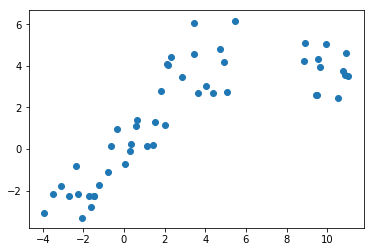

In [23]:
# plot scatter plot of randomly generated data

plt.scatter(X1[:,0],X1[:,1],marker='o')



# Agglomerative Clustering

At first randomly generated points will be clustered using __Agglomerative Clustering__. 

- __n_clusters__ : The number of clusters to form as well as no of centroids to generate.

- Value will be 4.

- __linkage__ : Which linkage criterion to use. The linkage criterion determines which distance to use between sets of observation. The algorithm will merge the pairs of cluster that minimize this criterion.

- Value wll be "Complete"

### Outline and Train Model

In [24]:
agglom=AgglomerativeClustering(n_clusters=4, linkage='complete')

In [25]:
agglom.fit(X1,y1)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='complete', memory=None,
            n_clusters=4,
            pooling_func=<function mean at 0x000001B69754FF28>)

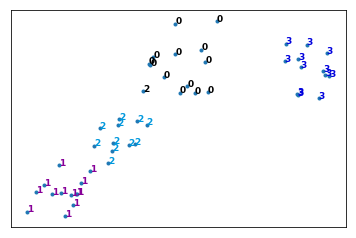

In [26]:
plt.figure(figsize=(6,4))

# These two lines of code are used to scale the data points down,
# Or else the data points will be scattered very far apart.

# Create a minimum and maximum range of X1.

x_min, x_max=np.min(X1,axis=0),np.max(X1,axis=0)

# Get the average distance for X1.

X1=(X1-x_min)/(x_max-x_min)

# This loop displays all of the data points

for i in range(X1.shape[0]):
    # Replace the data points with their respective cluster value 
    # (ex. 0) and is color coded with a colormap (plt.cm.spectral)
    
    plt.text(X1[i, 0], X1[i, 1], str(y1[i]),
             color=plt.cm.nipy_spectral(agglom.labels_[i] / 10.),
             fontdict={'weight': 'bold', 'size': 9})
    # Remove the x ticks, y ticks, x and y axis
plt.xticks([])
plt.yticks([])
#plt.axis('off')



# Display the plot of the original data before clustering
plt.scatter(X1[:, 0], X1[:, 1], marker='.')
# Display the plot
plt.show()

## Dendogram Associated for the Agglomerative Hierarchical Clustering

Remember that a __distance matrix__ contains the __distance from each point to every other point of a dataset__.

Use the function __distance_matrix__,  which requires __two inputs__. Use the Feature Matrix,  __X1__ as both inputs and save the distance matrix to a variable called __dist_matrix__

Remember that the distance values are symmetric, with a diagonal of 0's. This is one way of making sure your matrix is correct. (print out dist_matrix to make sure it's correct)

In [28]:
dist_matrix = distance_matrix(X1,X1) 
print(dist_matrix)


[[0.         0.3049106  0.22723945 ... 0.4609085  0.42510106 0.11991404]
 [0.3049106  0.         0.2047051  ... 0.70963483 0.18695124 0.41503466]
 [0.22723945 0.2047051  0.         ... 0.68794019 0.22344673 0.34456076]
 ...
 [0.4609085  0.70963483 0.68794019 ... 0.         0.86942731 0.34861093]
 [0.42510106 0.18695124 0.22344673 ... 0.86942731 0.         0.54472799]
 [0.11991404 0.41503466 0.34456076 ... 0.34861093 0.54472799 0.        ]]


Using the __linkage class__ from hierarchy, pass in the parameters:

- The distance matrix

- "complete" for complete linkage



In [29]:
Z=hierarchy.linkage(dist_matrix,'complete')

C:\Users\S BL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  """Entry point for launching an IPython kernel.


A Hierarchical clustering is typically visualized as a dendrogram as shown in the following cell. Each merge is represented by a horizontal line. The y-coordinate of the horizontal line is the similarity of the two clusters that were merged, where cities are viewed as singleton clusters. 
By moving up from the bottom layer to the top node, a dendrogram allows us to reconstruct the history of merges that resulted in the depicted clustering. 

Next, we will save the dendrogram to a variable called <b>dendro</b>. In doing this, the dendrogram will also be displayed.
Using the <b> dendrogram </b> class from hierarchy, pass in the parameter:
<ul> <li> Z </li> </ul>

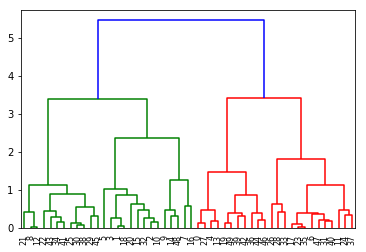

In [31]:
dendro=hierarchy.dendrogram(Z,orientation='right')

# Clustering on Vehicle Dataset

Imagine that an automobile manufacturer has developed prototypes for a new vehicle. Before introducing the new model into its range, the manufacturer wants to determine which existing vehicles on the market are most like the prototypes--that is, how vehicles can be grouped, which group is the most similar with the model, and therefore which models they will be competing against.

Our objective here, is to use clustering methods, to find the most distinctive clusters of vehicles. It will summarize the existing vehicles and help manufacturers to make decision about the supply of new models.

### Load and read data

lets read dataset to see what features the manufacturer has collected about the existing models.

In [33]:
data_df=pd.read_csv('cars_clus.csv')

print('Shape of data :',data_df.shape)

data_df.head()

Shape of data : (159, 16)


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.000,21.500,1.800,140.000,101.200,67.300,172.400,2.639,13.200,28.000,2.828,0.0
1,Acura,TL,39.384,19.875,0.000,28.400,3.200,225.000,108.100,70.300,192.900,3.517,17.200,25.000,3.673,0.0
2,Acura,CL,14.114,18.225,0.000,$null$,3.200,225.000,106.900,70.600,192.000,3.470,17.200,26.000,2.647,0.0
3,Acura,RL,8.588,29.725,0.000,42.000,3.500,210.000,114.600,71.400,196.600,3.850,18.000,22.000,2.150,0.0
4,Audi,A4,20.397,22.255,0.000,23.990,1.800,150.000,102.600,68.200,178.000,2.998,16.400,27.000,3.015,0.0


The feature sets include  price in thousands (price), engine size (engine_s), horsepower (horsepow), wheelbase (wheelbas), width (width), length (length), curb weight (curb_wgt), fuel capacity (fuel_cap) and fuel efficiency (mpg).

### Data Cleaning

Clean the dataset by dropping the rows that have null value:

In [37]:
print("Shape of dataset before cleaning:", data_df.size)
data_df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']]=data_df[[ 'sales', 'resale', 'type', 'price', 'engine_s',
       'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap',
       'mpg', 'lnsales']].apply(pd.to_numeric,errors='coerce') 

# to_numeric,error='coerce' , it coverts entries to numeric if not convertable coerce error will be raised and value will

#be set to Nan
data_df=data_df.dropna() #  # Row and columns with missing values are deleted

data_df=data_df.reset_index(drop=True)

print("Shape of dataset after cleaning:", data_df.size)

data_df.head()

Shape of dataset before cleaning: 2544
Shape of dataset after cleaning: 1872


,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition
0,Acura,Integra,16.919,16.360,0.0,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0
1,Acura,TL,39.384,19.875,0.0,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0
2,Acura,RL,8.588,29.725,0.0,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0
3,Audi,A4,20.397,22.255,0.0,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0
4,Audi,A6,18.780,23.555,0.0,33.95,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0


### Feature Selection

Select features set.

In [38]:
featureset = data_df[['engine_s',  'horsepow', 'wheelbas', 'width', 'length', 'curb_wgt', 'fuel_cap', 'mpg']]

### Normalization

Feature set is normalized using MinMaxScaler. __MinMaxScaler__ transforms features by scaling each feature to a given range. It is by default (0, 1). That is, this estimator scales and translates each feature individually such that it is between zero and one.

In [39]:
from sklearn.preprocessing import MinMaxScaler
X=featureset.values
min_max_scaler=MinMaxScaler()
feature_mtx=min_max_scaler.fit_transform(X)
feature_mtx[0:5]

array([[0.11428571, 0.21518987, 0.18655098, 0.28143713, 0.30625832,
        0.2310559 , 0.13364055, 0.43333333],
       [0.31428571, 0.43037975, 0.3362256 , 0.46107784, 0.5792277 ,
        0.50372671, 0.31797235, 0.33333333],
       [0.35714286, 0.39240506, 0.47722343, 0.52694611, 0.62849534,
        0.60714286, 0.35483871, 0.23333333],
       [0.11428571, 0.24050633, 0.21691974, 0.33532934, 0.38082557,
        0.34254658, 0.28110599, 0.4       ],
       [0.25714286, 0.36708861, 0.34924078, 0.80838323, 0.56724368,
        0.5173913 , 0.37788018, 0.23333333]])

# Clustering Using Scipy

In this section Scipy package is used to cluster the dataset:  
First, distance matrix is calculated. 

In [40]:
import scipy
leng=feature_mtx.shape[0]
D=scipy.zeros([leng,leng])

for i in range(leng):
    for j in range(leng):
        D[i,j]=scipy.spatial.distance.euclidean(feature_mtx[i],feature_mtx[j])

In agglomerative clustering, at each iteration, the algorithm must update the distance matrix to reflect the distance of the newly formed cluster with the remaining clusters in the forest. 
The following methods are supported in Scipy for calculating the distance between the newly formed cluster and each:
    - single
    - complete
    - average
    - weighted
    - centroid
    
    
We use __complete__ for our case, but feel free to change it to see how the results change.

In [46]:
import pylab
import scipy.cluster.hierarchy
Z=hierarchy.linkage(D,'complete')

C:\Users\S BL\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  This is separate from the ipykernel package so we can avoid doing imports until


Hierarchical clustering does not require a pre-specified number of clusters. However, in some applications we want a partition of disjoint clusters just as in flat clustering.
So you a cutting line can be used:

In [53]:
from scipy.cluster.hierarchy import fcluster
max_d=3
clusters=fcluster(Z,max_d,criterion='distance')
clusters

array([ 1,  5,  5,  6,  5,  4,  6,  5,  5,  5,  5,  5,  4,  4,  5,  1,  6,
        5,  5,  5,  4,  2, 11,  6,  6,  5,  6,  5,  1,  6,  6, 10,  9,  8,
        9,  3,  5,  1,  7,  6,  5,  3,  5,  3,  8,  7,  9,  2,  6,  6,  5,
        4,  2,  1,  6,  5,  2,  7,  5,  5,  5,  4,  4,  3,  2,  6,  6,  5,
        7,  4,  7,  6,  6,  5,  3,  5,  5,  6,  5,  4,  4,  1,  6,  5,  5,
        5,  6,  4,  5,  4,  1,  6,  5,  6,  6,  5,  5,  5,  7,  7,  7,  2,
        2,  1,  2,  6,  5,  1,  1,  1,  7,  8,  1,  1,  6,  1,  1],
      dtype=int32)

number of clusters can also be determined directly

In [51]:
from scipy.cluster.hierarchy import fcluster
k = 5
clusters = fcluster(Z, k, criterion='maxclust')
clusters

array([1, 3, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 1, 3, 3, 3, 3, 2, 1,
       5, 3, 3, 3, 3, 3, 1, 3, 3, 4, 4, 4, 4, 2, 3, 1, 3, 3, 3, 2, 3, 2,
       4, 3, 4, 1, 3, 3, 3, 2, 1, 1, 3, 3, 1, 3, 3, 3, 3, 2, 2, 2, 1, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 2, 1, 3, 3, 3, 3, 3, 2,
       3, 2, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1,
       3, 4, 1, 1, 3, 1, 1], dtype=int32)

In [42]:
agglom=AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1], dtype=int64)

## Dendrogram

Plot dendrogram

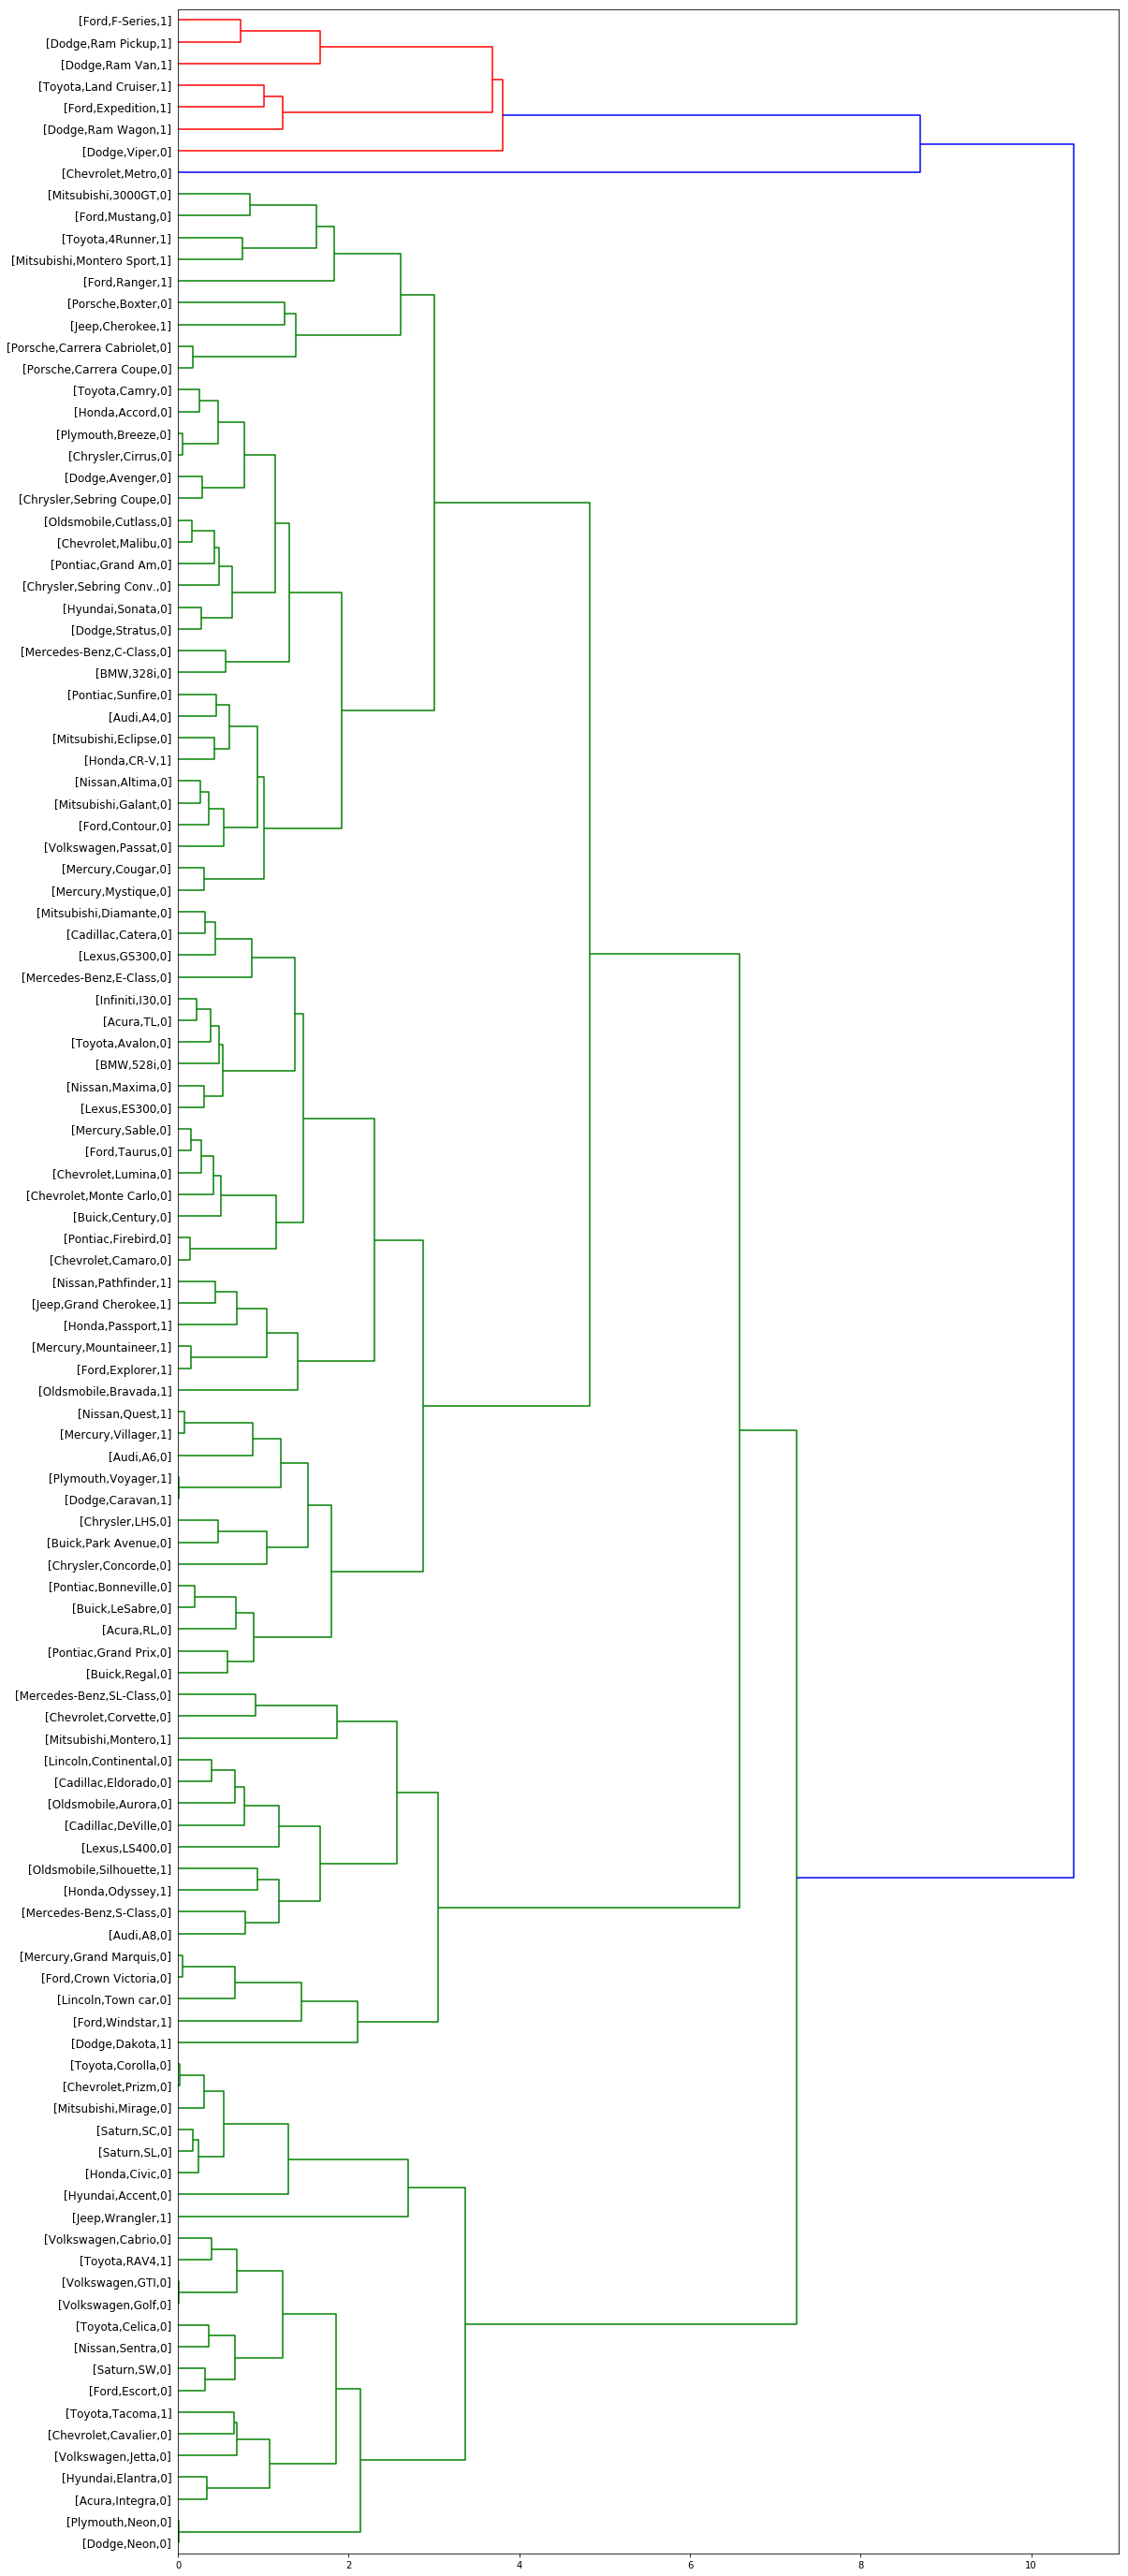

In [57]:
fig=pylab.figure(figsize=(18,50))

# define function for leaf labels
def llf(id):
    return '[%s,%s,%s]' %(data_df['manufact'][id],data_df['model'][id],int(float(data_df['type'][id])))

dendro=hierarchy.dendrogram(Z,leaf_label_func=llf,leaf_rotation=0, leaf_font_size =12, orientation = 'right')

# Clustering using Scikit-learn

In [58]:
dist_matrix = distance_matrix(feature_mtx,feature_mtx) 
print(dist_matrix)

[[0.         0.57777143 0.75455727 ... 0.28530295 0.24917241 0.18879995]
 [0.57777143 0.         0.22798938 ... 0.36087756 0.66346677 0.62201282]
 [0.75455727 0.22798938 0.         ... 0.51727787 0.81786095 0.77930119]
 ...
 [0.28530295 0.36087756 0.51727787 ... 0.         0.41797928 0.35720492]
 [0.24917241 0.66346677 0.81786095 ... 0.41797928 0.         0.15212198]
 [0.18879995 0.62201282 0.77930119 ... 0.35720492 0.15212198 0.        ]]


'AgglomerativeClustering' function from scikit-learn library is used to cluster the dataset. The AgglomerativeClustering performs a hierarchical clustering using a bottom up approach. The linkage criteria determines the metric used for the merge strategy:

- Ward minimizes the sum of squared differences within all clusters. It is a variance-minimizing approach and in this sense is similar to the k-means objective function but tackled with an agglomerative hierarchical approach.
- Maximum or complete linkage minimizes the maximum distance between observations of pairs of clusters.
- Average linkage minimizes the average of the distances between all observations of pairs of clusters.

In [59]:
agglom = AgglomerativeClustering(n_clusters = 6, linkage = 'complete')
agglom.fit(feature_mtx)
agglom.labels_

array([1, 2, 2, 1, 2, 3, 1, 2, 2, 2, 2, 2, 3, 3, 2, 1, 1, 2, 2, 2, 5, 1,
       4, 1, 1, 2, 1, 2, 1, 1, 1, 5, 0, 0, 0, 3, 2, 1, 2, 1, 2, 3, 2, 3,
       0, 3, 0, 1, 1, 1, 2, 3, 1, 1, 1, 2, 1, 1, 2, 2, 2, 3, 3, 3, 1, 1,
       1, 2, 1, 2, 2, 1, 1, 2, 3, 2, 3, 1, 2, 3, 5, 1, 1, 2, 3, 2, 1, 3,
       2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1,
       2, 0, 1, 1, 1, 1, 1], dtype=int64)

In [64]:
# add a new field to our dataframe to show the cluster of each row
data_df['cluster_']=agglom.labels_
data_df.head(15)

,manufact,model,sales,resale,type,price,engine_s,horsepow,wheelbas,width,length,curb_wgt,fuel_cap,mpg,lnsales,partition,cluster,cluster_
0,Acura,Integra,16.919,16.360,0.0,21.500,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2.828,0.0,1,1
1,Acura,TL,39.384,19.875,0.0,28.400,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,3.673,0.0,2,2
2,Acura,RL,8.588,29.725,0.0,42.000,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,2.150,0.0,2,2
3,Audi,A4,20.397,22.255,0.0,23.990,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,3.015,0.0,1,1
4,Audi,A6,18.780,23.555,0.0,33.950,2.8,200.0,108.7,76.1,192.0,3.561,18.5,22.0,2.933,0.0,2,2
5,Audi,A8,1.380,39.000,0.0,62.000,4.2,310.0,113.0,74.0,198.2,3.902,23.7,21.0,0.322,0.0,3,3
6,BMW,328i,9.231,28.675,0.0,33.400,2.8,193.0,107.3,68.5,176.0,3.197,16.6,24.0,2.223,0.0,1,1
7,BMW,528i,17.527,36.125,0.0,38.900,2.8,193.0,111.4,70.9,188.0,3.472,18.5,24.8,2.864,0.0,2,2
8,Buick,Century,91.561,12.475,0.0,21.975,3.1,175.0,109.0,72.7,194.6,3.368,17.5,25.0,4.517,0.0,2,2
9,Buick,Regal,39.350,13.740,0.0,25.300,3.8,240.0,109.0,72.7,196.2,3.543,17.5,23.0,3.672,0.0,2,2


Text(0,0.5,'mpg')

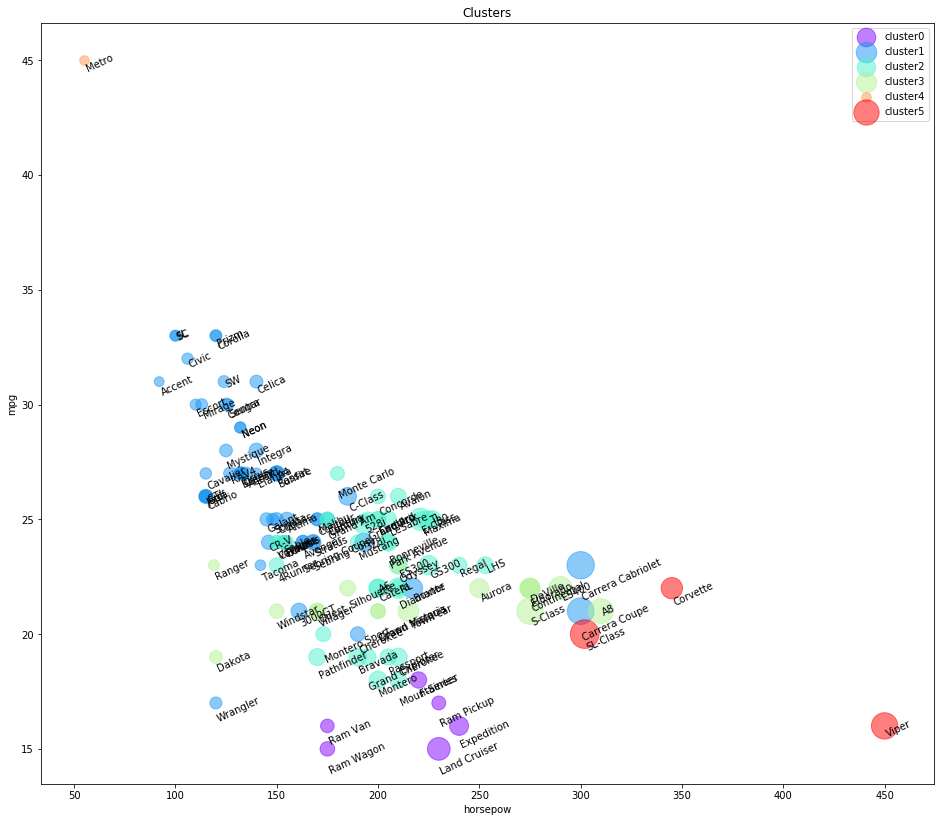

In [63]:
import matplotlib.cm as cm
n_clusters = max(agglom.labels_)+1
colors = cm.rainbow(np.linspace(0, 1, n_clusters))
cluster_labels = list(range(0, n_clusters))

# Create a figure of size 6 inches by 4 inches.
plt.figure(figsize=(16,14))

for color, label in zip(colors, cluster_labels):
    subset = data_df[data_df.cluster_ == label]
    for i in subset.index:
            plt.text(subset.horsepow[i], subset.mpg[i],str(subset['model'][i]), rotation=25) 
    plt.scatter(subset.horsepow, subset.mpg, s= subset.price*10, c=color, label='cluster'+str(label),alpha=0.5)
#    plt.scatter(subset.horsepow, subset.mpg)
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')

Distribution of each cluster using the scatter plot is shown, but it is not very clear where is the centroid of each cluster. Moreover, there are 2 types of vehicles in our dataset, "truck" (value of 1 in the type column) and "car" (value of 0 in the type column). So, we use them to distinguish the classes, and summarize the cluster. First we count the number of cases in each group:

In [65]:
data_df.groupby(['cluster_','type'])['cluster_'].count()

cluster_  type
0         1.0      6
1         0.0     47
          1.0      5
2         0.0     27
          1.0     11
3         0.0     10
          1.0      7
4         0.0      1
5         0.0      3
Name: cluster_, dtype: int64

In [69]:
#characteristics of each cluster:

agg_cars=data_df.groupby(['cluster_','type'])['horsepow','engine_s','mpg','price'].mean()
agg_cars

horsepow  engine_s        mpg      price
cluster_ type                                            
0        1.0   211.666667  4.483333  16.166667  29.024667
1        0.0   146.531915  2.246809  27.021277  20.306128
         1.0   145.000000  2.580000  22.200000  17.009200
2        0.0   203.111111  3.303704  24.214815  27.750593
         1.0   182.090909  3.345455  20.181818  26.265364
3        0.0   256.500000  4.410000  21.500000  42.870400
         1.0   160.571429  3.071429  21.428571  21.527714
4        0.0    55.000000  1.000000  45.000000   9.235000
5        0.0   365.666667  6.233333  19.333333  66.010000

We have 3 main clusters with the majority of vehicles in those.

__Cars__:
- Cluster 1: with almost high mpg, and low in horsepower.
- Cluster 2: with good mpg and horsepower, but higher price than average.
- Cluster 3: with low mpg, high horsepower, highest price.
    
    
    
__Trucks__:
- Cluster 1: with almost highest mpg among trucks, and lowest in horsepower and price.
- Cluster 2: with almost low mpg and medium horsepower, but higher price than average.
- Cluster 3: with good mpg and horsepower, low price.

 __type__ , and __price__ of cars is not used in the clustering process, but Hierarchical clustering could forge the clusters and discriminate them with quite high accuracy.

Text(0,0.5,'mpg')

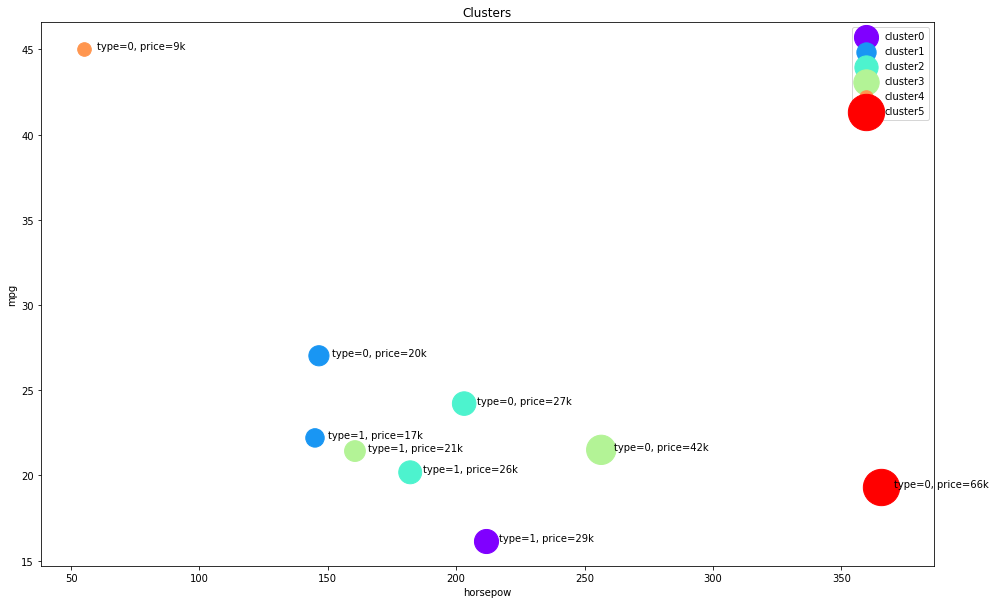

In [70]:
plt.figure(figsize=(16,10))
for color, label in zip(colors, cluster_labels):
    subset = agg_cars.loc[(label,),]
    for i in subset.index:
        plt.text(subset.loc[i][0]+5, subset.loc[i][2], 'type='+str(int(i)) + ', price='+str(int(subset.loc[i][3]))+'k')
    plt.scatter(subset.horsepow, subset.mpg, s=subset.price*20, c=color, label='cluster'+str(label))
plt.legend()
plt.title('Clusters')
plt.xlabel('horsepow')
plt.ylabel('mpg')